In [1]:
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor='dimgray', linewidth=1)

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "last_expr"
pd.options.display.max_columns = 50
%matplotlib inline
warnings.filterwarnings("ignore")
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
city_day = pd.read_csv("india-air-quality-2015-2020/city_day.csv")
city_hour = pd.read_csv("india-air-quality-2015-2020/city_hour.csv")
station_hour = pd.read_csv("india-air-quality-2015-2020/station_hour.csv")
station_day = pd.read_csv("india-air-quality-2015-2020/station_day.csv")

print(city_day['City'].unique())
print(station_day['StationId'].unique())

['Ahmedabad' 'Aizawl' 'Amaravati' 'Amritsar' 'Bengaluru' 'Bhopal'
 'Brajrajnagar' 'Chandigarh' 'Chennai' 'Coimbatore' 'Delhi' 'Ernakulam'
 'Gurugram' 'Guwahati' 'Hyderabad' 'Jaipur' 'Jorapokhar' 'Kochi' 'Kolkata'
 'Lucknow' 'Mumbai' 'Patna' 'Shillong' 'Talcher' 'Thiruvananthapuram'
 'Visakhapatnam']
['AP001' 'AP005' 'AS001' 'BR005' 'BR006' 'BR007' 'BR008' 'BR009' 'BR010'
 'CH001' 'DL001' 'DL002' 'DL003' 'DL004' 'DL005' 'DL006' 'DL007' 'DL008'
 'DL009' 'DL010' 'DL011' 'DL012' 'DL013' 'DL014' 'DL015' 'DL016' 'DL017'
 'DL018' 'DL019' 'DL020' 'DL021' 'DL022' 'DL023' 'DL024' 'DL025' 'DL026'
 'DL027' 'DL028' 'DL029' 'DL030' 'DL031' 'DL032' 'DL033' 'DL034' 'DL035'
 'DL036' 'DL037' 'DL038' 'GJ001' 'HR011' 'HR012' 'HR013' 'HR014' 'JH001'
 'KA002' 'KA003' 'KA004' 'KA005' 'KA006' 'KA007' 'KA008' 'KA009' 'KA010'
 'KA011' 'KL002' 'KL004' 'KL007' 'KL008' 'MH005' 'MH006' 'MH007' 'MH008'
 'MH009' 'MH010' 'MH011' 'MH012' 'MH013' 'MH014' 'ML001' 'MP001' 'MZ001'
 'OD001' 'OD002' 'PB001' 'RJ004' 'RJ005' '

In [ ]:
f_day = open("overall-missing-station-day.txt", "w")
f_hour = open("overall-missing-station-hour.txt", "w")

f_city_hour = open('overall-missing-city-hour.txt', 'w')

num = 0
for city in city_hour["City"].unique():
    df = city_hour[city_hour["City"] ==  city]
    f_city_hour.write("City: {}\n".format(city))
    f_city_hour.write("Length: {}\n".format(len(df)))
    overall = 0
    missing = df.isnull().sum() / len(df) * 100
    f_city_hour.write(missing.to_string())
    f_city_hour.write("\n")
    for i in missing:
        overall += i
    overall = round(overall / missing.shape[0], 3)
    f_city_hour.write("Missing Overall: {}%\n".format(overall))
    f_city_hour.write("----------------------------\n")


for stationid in station_day["StationId"].unique():
    df = station_day[station_day["StationId"] == stationid]
    f_hour.write("Station: " + stationid)
    f_hour.write("\n")
    missing = df.isnull().sum() / len(df) * 100
    f_hour.write(missing.to_string())
    f_hour.write("\n")
    overall = 0
    for i in missing:
        overall += i
    overall = round(overall / missing.shape[0], 2)
    f_hour.write("Overall = " + str(overall) + "%\n")
    f_hour.write("----------------------------\n")


f_day.close()
f_hour.close()

In [6]:
overall_city_hour = {}
overall_station_hour = {}

num = 0
for city in city_hour["City"].unique():
    df = city_hour[city_hour["City"] ==  city]
    overall = 0
    missing = df.isnull().sum() / len(df) * 100
    for i in missing:
        overall += i
    overall = round(overall / missing.shape[0], 3)
    overall_city_hour['{}'.format(num)] = overall
    num += 1


for stationid in station_hour["StationId"].unique():
    df = station_hour[station_hour["StationId"] == stationid]
    overall = 0
    missing = df.isnull().sum() / len(df) * 100
    for i in missing:
        overall += i
    overall = round(overall / missing.shape[0], 3)
    overall_station_hour[stationid] = overall

In [7]:
cities = city_hour['City'].unique()
cities = cities.flatten()

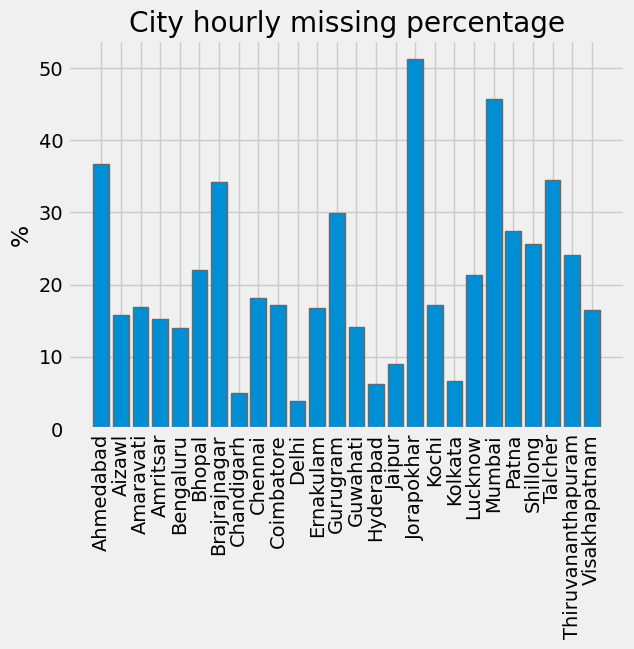

In [8]:
keys = np.array(list(overall_city_hour.keys()))
values = overall_city_hour.values()

plt.bar(keys, values)
plt.ylabel("%")
plt.xticks(keys, cities, rotation=90)
plt.title("City hourly missing percentage")
plt.show()

In [ ]:
city_delhi = city_hour[city_hour['City'] == 'Delhi']
city_delhi

In [ ]:
city_chandigarh = city_hour[city_hour['City'] == 'Chandigarh']
city_chandigarh

In [ ]:
# city_chandigarh = city_chandigarh.drop('City', axis=1)
city_chandigarh.to_csv('india-air-quality-2015-2020/Chandigarh-hour.csv', index=False)

In [ ]:
city_delhi.to_csv('india-air-quality-2015-2020/Delhi-hour.csv', index=False)

In [ ]:
station_day_extract = station_day[station_day['StationId'] == 'CH001']
station_hour_extract = station_hour[station_hour['StationId'] == 'CH001']

In [ ]:
station_day_extract.drop('StationId', axis=1)
station_hour_extract.drop('StationId', axis=1)

In [ ]:
df_chandigarh = city_day[city_day['City'] == 'Chandigarh']
df_chandigarh 

In [ ]:
df_chandigarh_hour = city_hour[city_hour['City'] == 'Chandigarh']
df_chandigarh_hour

In [ ]:
# df_chandigarh = df_chandigarh.drop('City', axis=1)
df_chandigarh.to_csv('india-air-quality-2015-2020/Chandigarh-day.csv', index=False)
df_chandigarh

In [ ]:
station_day_extract.to_csv('india-air-quality-2015-2020/station-CH001-day.csv', index=False)
station_hour_extract.to_csv('india-air-quality-2015-2020/station-CH001-hour.csv', index=False)

In [ ]:
df_chandigarh_hour = df_chandigarh_hour.drop('City', axis=1)
df_chandigarh_hour.to_csv('india-air-quality-2015-2020/Chandigarh-hour.csv', index=False)
df_chandigarh_hour

In [ ]:
aqi = df_chandigarh[['AQI', 'AQI_Bucket']].copy()
df_chandigarh.drop(columns=['AQI', 'AQI_Bucket'])
aqi.to_csv('india-air-quality-2015-2020/aqi.csv', index=False)